In [1]:
%pwd

'/content'

In [2]:
!mkdir"C:\Users\amita\Downloads\loan_prediction_casestudy\loan_prediction\LoanDefaultAnalysis_Python.ipynb"

/bin/bash: mkdirC:\Users\amita\Downloads\loan_prediction_casestudy\loan_prediction\LoanDefaultAnalysis_Python.ipynb: command not found


In [3]:
%pwd

'/content'

In [4]:
! mkdir "./LoanDefaultAnalysis_Python"

mkdir: cannot create directory ‘./LoanDefaultAnalysis_Python’: File exists


In [5]:
ls -ltr | grep Python

drwxr-xr-x 3 root root     4096 Mar  4 17:23 LoanDefaultAnalysis_Python/


In [6]:
%cd LoanDefaultAnalysis_Python/

/content/LoanDefaultAnalysis_Python


In [7]:
pwd

'/content/LoanDefaultAnalysis_Python'

In [8]:
! pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.4.2
bs4                           0.0.1
CacheC

In [9]:
! pip install sweetviz
! pip install pandas_profiling --upgrade

     |████████████████████████████████| 11.2 MB 14.2 MB/s 
     |████████████████████████████████| 895 kB 50.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [10]:
! pip install seaborn 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
import os
import sys

In [13]:
url = "https://raw.githubusercontent.com/lemoinef/Loan-Default-Prediction/master/loans_2007.csv"
raw_data = pd.read_csv(url)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [15]:
raw_data.to_csv("raw_loan_default.csv", index= False)

In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [17]:
# download LCDataDitionary from system 
# upload url here:
data = pd.read_excel("/content/LCDataDictionary.xlsx")

In [18]:
data

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [19]:
raw_data.shape

(42538, 52)

In [20]:
raw_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [21]:
# _1st_13_set:
features_1st_13_set = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership']
data[data["LoanStatNew"].isin(features_1st_13_set)]


,LoanStatNew,Description
19,emp_length,Employment length in years. Possible values ar...
20,emp_title,The job title supplied by the Borrower when ap...
23,funded_amnt,The total amount committed to that loan at tha...
24,funded_amnt_inv,The total amount committed by investors for th...
25,grade,LC assigned loan grade
26,home_ownership,The home ownership status provided by the borr...
27,id,A unique LC assigned ID for the loan listing.
33,installment,The monthly payment owed by the borrower if th...
34,int_rate,Interest Rate on the loan
41,loan_amnt,The listed amount of the loan applied for by t...


In [22]:
raw_data.loc[:5,features_1st_13_set]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT


In [23]:
# drop the columns which is not usefull:
drop_col_1st_set = ["id",	"member_id", "funded_amnt",	"funded_amnt_inv",
                    "grade" ,	"sub_grade",	"emp_title"]


In [24]:
features_2nd_13_set = ['annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths']
data[data["LoanStatNew"].isin(features_2nd_13_set)]


,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan...
4,annual_inc,The self-reported annual income provided by th...
13,delinq_2yrs,The number of 30+ days past-due incidences of ...
16,dti,A ratio calculated using the borrower’s total ...
18,earliest_cr_line,The month the borrower's earliest reported cre...
32,inq_last_6mths,The number of inquiries in past 6 months (excl...
35,issue_d,The month which the loan was funded
42,loan_status,Current status of the loan
87,purpose,A category provided by the borrower for the lo...
88,pymnt_plan,Indicates if a payment plan has been put in pl...


In [25]:
raw_data.loc[:5,features_2nd_13_set]

,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths
0,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0
1,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0
2,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0
3,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0
4,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0
5,36000.0,Source Verified,Dec-2011,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0


In [26]:
# drop columns:
drop_col_2nd_set = ["issue_d", "zip_code"]

In [27]:
# _3rd_13_set:
features_3rd_13_set = ['open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee']
data[data["LoanStatNew"].isin(features_3rd_13_set)]

,LoanStatNew,Description
29,initial_list_status,The initial listing status of the loan. Possib...
73,open_acc,The number of open credit lines in the borrowe...
80,out_prncp,Remaining outstanding principal for total amou...
81,out_prncp_inv,Remaining outstanding principal for portion of...
85,pub_rec,Number of derogatory public records
90,revol_bal,Total credit revolving balance
91,revol_util,"Revolving line utilization rate, or the amount..."
99,total_acc,The total number of credit lines currently in ...
105,total_pymnt,Payments received to date for total amount funded
106,total_pymnt_inv,Payments received to date for portion of total...


In [28]:
raw_data.loc[:5,features_3rd_13_set]

,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00
1,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1014.530000,1014.53,456.46,435.17,0.00
2,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00
3,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97
4,15.0,0.0,27783.0,53.9%,38.0,f,73.71,73.71,3987.860000,3987.86,2926.29,1061.57,0.00
5,9.0,0.0,7963.0,28.3%,12.0,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00


In [29]:
# drop columns:
drop_col_3rd_set = ["out_prncp", "out_prncp_inv",	"total_pymnt",	
                    "total_pymnt_inv","total_rec_prncp", "total_rec_int",
                    "total_rec_late_fee"]

In [30]:
# _4th_13_set:
features_4th_13_set = ['recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens']
data[data["LoanStatNew"].isin(features_4th_13_set)]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
6,application_type,Indicates whether the loan is an individual ap...
10,chargeoff_within_12_mths,Number of charge-offs within 12 months
11,collection_recovery_fee,post charge off collection fee
12,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
14,delinq_amnt,The past-due amount owed for the accounts on w...
36,last_credit_pull_d,The most recent month LC pulled credit for thi...
39,last_pymnt_amnt,Last total payment amount received
40,last_pymnt_d,Last month payment was received
84,policy_code,publicly available policy_code=1\nnew products...


In [31]:
raw_data.loc[:5,features_4th_13_set]

,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0.0,0.00,Jan-2015,171.62,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,Jun-2014,649.91,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,Dec-2016,67.79,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,0.0,0.00,Jan-2015,161.03,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [32]:
# drop columns:
drop_col_4th_set = ["recoveries",	"collection_recovery_fee",
                    "last_pymnt_d",	"last_pymnt_amnt"]

In [33]:
#sum of drop columns from all _sets:
columns_to_drop = drop_col_1st_set + drop_col_2nd_set + drop_col_3rd_set + drop_col_4th_set  
                 

In [34]:
columns_to_drop

['id',
 'member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'sub_grade',
 'emp_title',
 'issue_d',
 'zip_code',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt']

In [35]:
#filter data- after dropinf columns:
filtered_data = raw_data.drop(columns_to_drop, axis=1)

In [36]:
filtered_data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,...,f,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,...,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [37]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   term                        42535 non-null  object 
 2   int_rate                    42535 non-null  object 
 3   installment                 42535 non-null  float64
 4   emp_length                  41423 non-null  object 
 5   home_ownership              42535 non-null  object 
 6   annual_inc                  42531 non-null  float64
 7   verification_status         42535 non-null  object 
 8   loan_status                 42535 non-null  object 
 9   pymnt_plan                  42535 non-null  object 
 10  purpose                     42535 non-null  object 
 11  title                       42522 non-null  object 
 12  addr_state                  42535 non-null  object 
 13  dti                         425

In [38]:
filtered_data.shape

(42538, 32)

In [39]:
filtered_data.to_csv("filtered_loan_default.csv",index= False)

In [40]:
filtered_data["loan_status"].value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

In [41]:
# making a plot:
import matplotlib

In [42]:
matplotlib.__version__

'3.1.3'

In [43]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [44]:
! pip install seaborn
import seaborn as sns

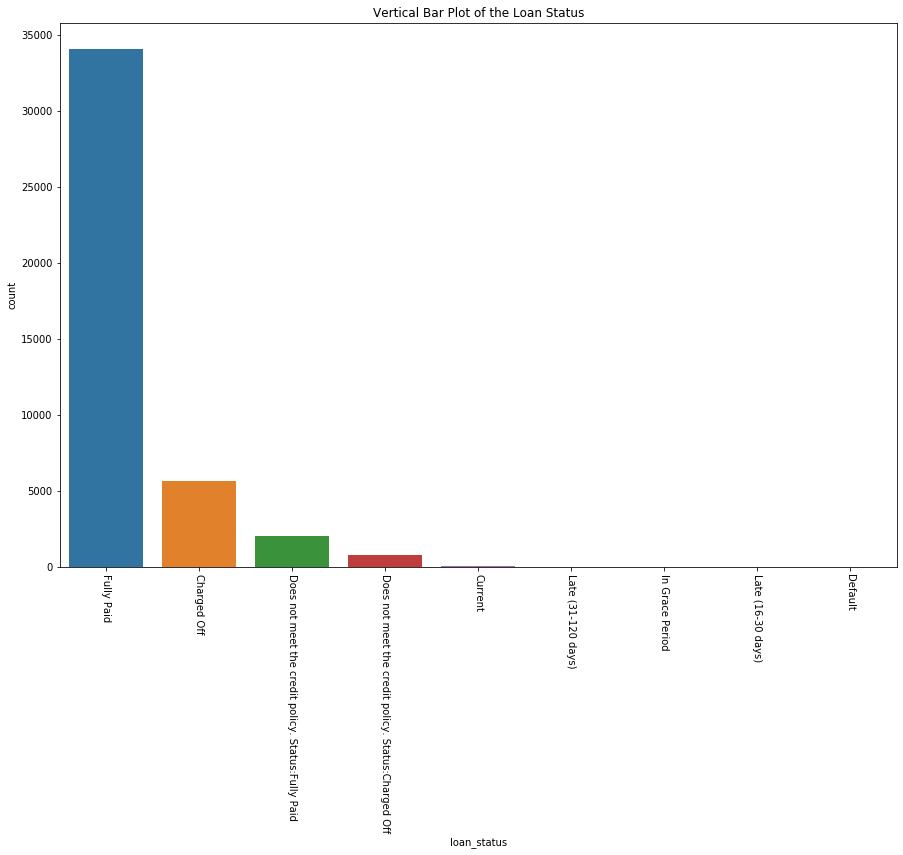

In [45]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="loan_status",data=filtered_data,
                   order = filtered_data["loan_status"].value_counts().index)
plt.title("Vertical Bar Plot of the Loan Status")
plt.xticks(rotation=270)
plt.show()

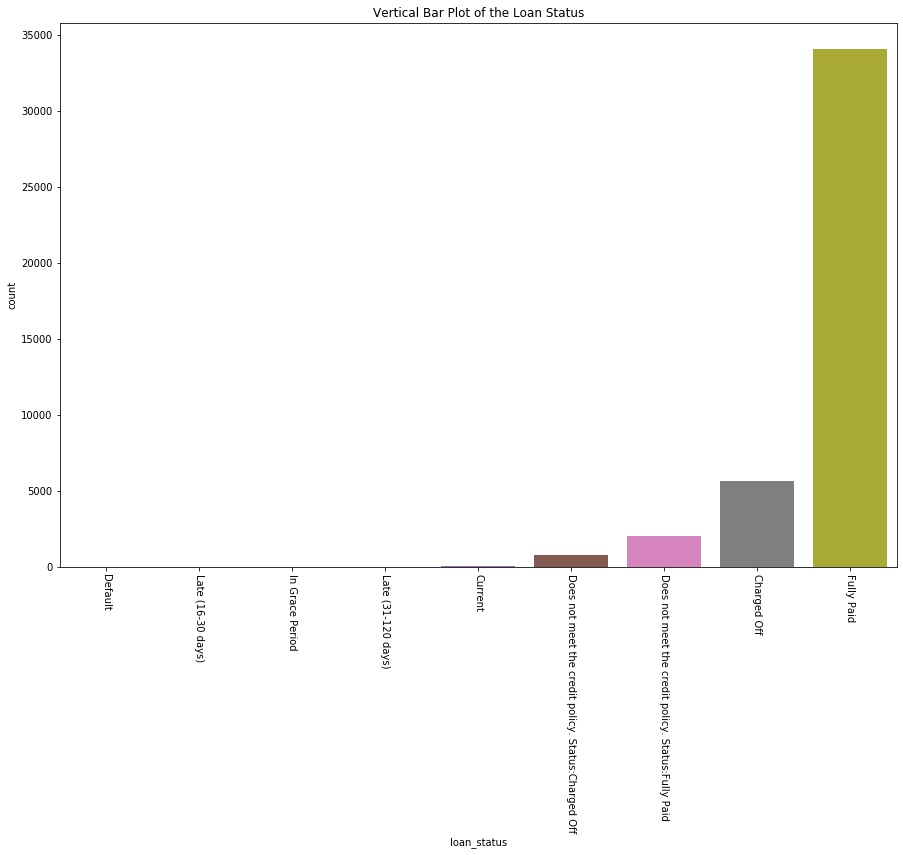

In [46]:
# reverse plot:
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status",data=filtered_data,
                   order = filtered_data["loan_status"].value_counts(ascending=True).index)
plt.title("Vertical Bar Plot of the Loan Status")
plt.xticks(rotation=270)
plt.show()


In [47]:
# here, we have only 2 posibities are important .. so we will remove other posibilties:

In [48]:
df = filtered_data[filtered_data['loan_status'].isin(["Fully Paid","Charged Off"])]

In [49]:
df.to_csv("loan_data.csv", index=False)

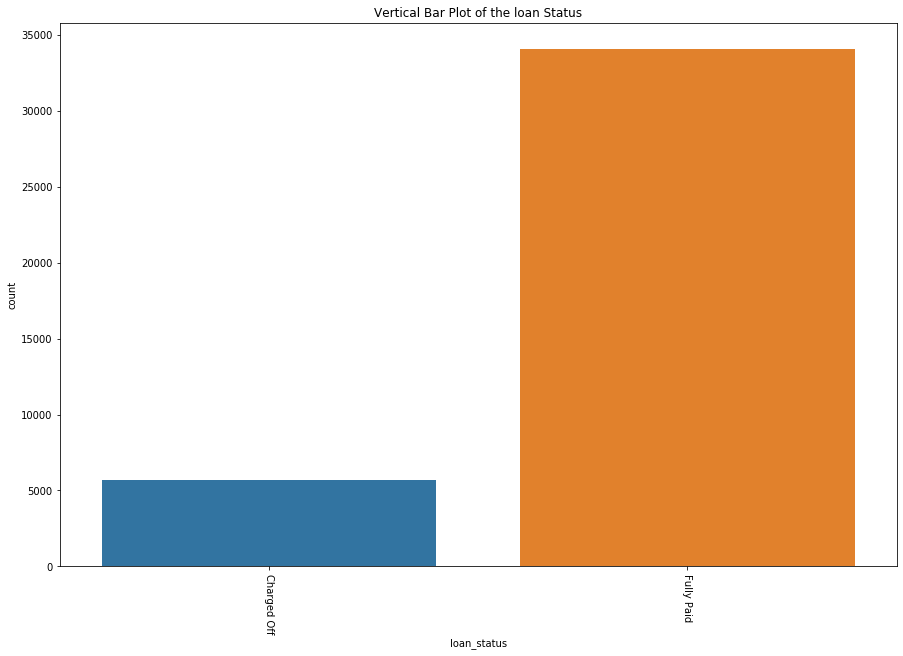

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status",data=df,
              order = df["loan_status"].value_counts(ascending=True).index)
plt.title("Vertical Bar Plot of the loan Status")
plt.xticks(rotation=270)
plt.show()

**Exploratory Data Analysis: [EDA]**


1.  Distribution of Numerical Attributes.
   [Dist. plot & Histogram Plot]
	a. Loan Amount
	b. Intrest Rate
	c. Installment
	d. Annual Income
	e. Revol Balance
	f. Revol Utilization

2. Unique and counts of categorical attributes.
   [count plot, pie plot]
	a. Term
	b. Employment Length
	c. Home Ownership
	d. Verification Status
	e. Purpose / Title

3. Relation between two numerical attributes.
   [scatter plot]
	a. 6C2

4. Corelation Matrix is between numerical values.

5. Relation between Numerical & categorical values.
	a. All Numerical attributes wrt Loan status
	b. All Numerical attributes wrt Loan status 
	    add the 'hue' with all categorical values one at a time.

6. Not conclusive Data:

	-
	-
	-

7. Additional Info:

8. Insights:


*   List item

*   List item
*   List item


*   List item




In [51]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(filtered_data, title= "Pandas profiling Report")
profile.to_file("/content/pandas_profile_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
import sweetviz
my_report = sweetviz.analyze(filtered_data)
my_report.show_html("FinalReport.html")

                                             |          | [  0%]   00:00 -> (? left)

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [53]:
'show'

'show'

**Data Pre-Processing using Python**

Data Quality | Sanity | Integrity Check

In [54]:
#"describe" with include 'object' gives categorical values:
df.describe(include = np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,term,int_rate,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,last_credit_pull_d,application_type
count,39747,39747,38671,39747,39747,39747,39747,39747,39736,39747,39747,39697,39747,39745,39747
unique,2,371,11,5,3,2,1,14,19632,50,526,1089,1,113,1
top,36 months,10.99%,10+ years,RENT,Not Verified,Fully Paid,n,debt_consolidation,Debt Consolidation,CA,Nov-1998,0%,f,Dec-2016,INDIVIDUAL
freq,29096,958,8888,18897,16923,34085,39747,18651,2187,7101,369,980,39747,10638,39747


In [55]:
# only df.describe gives "numerical values"
df.describe()


,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39747.000000,39747.000000,3.974700e+04,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39691.0,39747.0,39747.0,39691.0,39747.0,39050.000000,39708.0
mean,11225.755403,324.652461,6.898086e+04,13.315923,0.146502,0.869022,9.292827,0.055174,13388.582836,22.085868,0.0,1.0,0.0,0.0,0.0,0.043303,0.0
std,7460.917599,208.889015,6.378726e+04,6.678206,0.491817,1.070176,4.400069,0.237716,15899.681549,11.400633,0.0,0.0,0.0,0.0,0.0,0.204421,0.0
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,167.080000,4.050000e+04,8.180000,0.000000,0.000000,6.000000,0.000000,3701.500000,13.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,280.390000,5.900000e+04,13.410000,0.000000,1.000000,9.000000,0.000000,8855.000000,20.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,430.780000,8.231400e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17062.500000,29.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [56]:
# here, as we see from "describe" there are mean min, std. which has a 0 values.
# which are not much useful.
# we can drop them.
# drop columns_names which has "nan or missing values":
orig_columns = df.columns
drop_columns = []
for col in orig_columns:
  col_series = df[col].dropna().unique()
  if len(col_series) == 1:
    drop_columns.append(col)
df = df.drop(drop_columns, axis = 1)
drop_columns 

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [57]:
# check how many rows & coloumns we have now: 
# using "shape" func:
df.shape

(39747, 23)

Handling|Dealing|Treating Missing Values:

In [58]:
# count of null values:
null_count = df.isnull().sum()
null_count

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1076
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [59]:
# drop all columns which has missing or nan values:
df = df.drop("pub_rec_bankruptcies", axis=1)
df = df.dropna(axis=0)

In [60]:
null_count =df.isnull().sum()
null_count

loan_amnt              0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
dtype: int64

Handling|Dealing|Treating Categorical|String Values

In [61]:
# checking the objects nd float values:
# using 'dtypes'
print(df.dtypes.value_counts())

object     12
float64    10
dtype: int64


In [62]:
# columns_names which value is in "object" format:
object_columns_df = df.select_dtypes(include= ["object"])
object_columns_df.iloc[0]

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
loan_status             Fully Paid
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Dec-2016
Name: 0, dtype: object

In [63]:
columns = ["term", "emp_length", 
           "home_ownership","verification_status",
           "addr_state"]
for col in columns:
  print(df[col].value_counts())
  print(" ")

 36 months    28234
 60 months    10378
Name: term, dtype: int64
 
10+ years    8886
< 1 year     4573
2 years      4387
3 years      4090
4 years      3429
5 years      3279
1 year       3236
6 years      2224
7 years      1770
8 years      1480
9 years      1258
Name: emp_length, dtype: int64
 
RENT        18451
MORTGAGE    17226
OWN          2836
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
 
Not Verified       16466
Verified           12354
Source Verified     9792
Name: verification_status, dtype: int64
 
CA    6903
NY    3707
FL    2776
TX    2672
NJ    1821
IL    1486
PA    1480
VA    1377
GA    1357
MA    1312
OH    1190
MD    1033
AZ     831
WA     806
CO     768
NC     760
CT     733
MI     688
MO     661
MN     591
NV     482
SC     464
WI     444
OR     434
AL     431
LA     426
KY     323
OK     293
KS     260
UT     252
AR     235
DC     212
RI     197
NM     183
HI     169
WV     168
NH     162
DE     110
WY      79
MT      79
AK      77
SD     

In [64]:
# for 'purpose' & 'title' will do encoding. one-hot encoding.
# because they doesn't have categorical values:
print(df["purpose"].value_counts())
print(" ")
print(df["title"].value_counts())

debt_consolidation    18239
credit_card            4999
other                  3821
home_improvement       2883
major_purchase         2108
small_business         1779
car                    1497
wedding                 934
medical                 668
moving                  557
house                   369
vacation                351
educational             312
renewable_energy         95
Name: purpose, dtype: int64
 
Debt Consolidation            2145
Debt Consolidation Loan       1691
Personal Loan                  643
Consolidation                  508
debt consolidation             488
                              ... 
Last Credit Card Refinance       1
Fidelity Payoff                  1
DYLAN'S PERSONAL LOAN            1
Pay down debt loan               1
JAL Loan                         1
Name: title, Length: 19133, dtype: int64


# next values are dates:["emp_length"] 
# for that will use "earliest_cr_line" nd "last_credit_pull_d"


1. earliest_cr_line: "The month the borrower's earliest reported credit line was opened"


2. last_credit_pull_d: "The most recent month LC pulled credit for this loan"



> int_rate : it's not only numerical. there are % with numerical values. will split it only for numerical values.

> revol_util: "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."




In [65]:
mapping_dict = {
    "emp_length" : {
        "10+ years": 10,
        "9 years":9,
        "8 years":8,
        "7 years":7,
        "6 years":6,
        "5 years":5,
        "4 years":4,
        "3 years":3,
        "2 years":2,
        "1 years":1,
        "<1 years":0,
        "n/a":0
        }
}
df = df.drop(["last_credit_pull_d","earliest_cr_line","addr_state","title"], axis=1)

df["int_rate"] = df["int_rate"].str.rstrip("%").astype("float")

df["revol_util"] =df["revol_util"].str.rstrip("%").astype("float")

df = df.replace(mapping_dict)


One-hot encoding:

In [66]:
df

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36 months,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0
2,2400.0,36 months,15.96,84.33,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0
3,10000.0,36 months,13.49,339.31,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0
5,5000.0,36 months,7.90,156.46,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36 months,8.07,78.42,4,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,11.33,0.0,0.0,13.0,0.0,7274.0,13.1,40.0
39782,8500.0,36 months,10.28,275.38,3,RENT,18000.0,Not Verified,Fully Paid,credit_card,6.40,1.0,1.0,6.0,0.0,8847.0,26.9,9.0
39783,5000.0,36 months,8.07,156.84,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,2.30,0.0,0.0,11.0,0.0,9698.0,19.4,20.0
39784,5000.0,36 months,7.43,155.38,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,other,3.72,0.0,0.0,17.0,0.0,85607.0,0.7,26.0


In [67]:
# will make dummy data using "one-hor encoding"
categorical_columns = ["home_ownership","verification_status",
                       "emp_length","purpose","term"]
dummy_df = pd.get_dummies(df[categorical_columns])
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(categorical_columns, axis=1) 

In [68]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,24000.0,Fully Paid,27.65,0.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,59.83,30000.0,Charged Off,1.00,0.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,12252.0,Fully Paid,8.72,0.0,2.0,2.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,339.31,49200.0,Fully Paid,20.00,0.0,1.0,10.0,0.0,...,0,0,0,1,0,0,0,0,1,0
5,5000.0,7.90,156.46,36000.0,Fully Paid,11.20,0.0,3.0,9.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38612 entries, 0 to 39785
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38612 non-null  float64
 1   int_rate                             38612 non-null  float64
 2   installment                          38612 non-null  float64
 3   annual_inc                           38612 non-null  float64
 4   loan_status                          38612 non-null  object 
 5   dti                                  38612 non-null  float64
 6   delinq_2yrs                          38612 non-null  float64
 7   inq_last_6mths                       38612 non-null  float64
 8   open_acc                             38612 non-null  float64
 9   pub_rec                              38612 non-null  float64
 10  revol_bal                            38612 non-null  float64
 11  revol_util                  

**Handling|Dealing|Treating Outliers**

***BOX PLOT | InterQuartile Range Method | Percentile Method***


---
I = [ q 0.25 − 1.5 ⋅ I Q R ; q 0.75 + 1.5 ⋅ I Q R ]


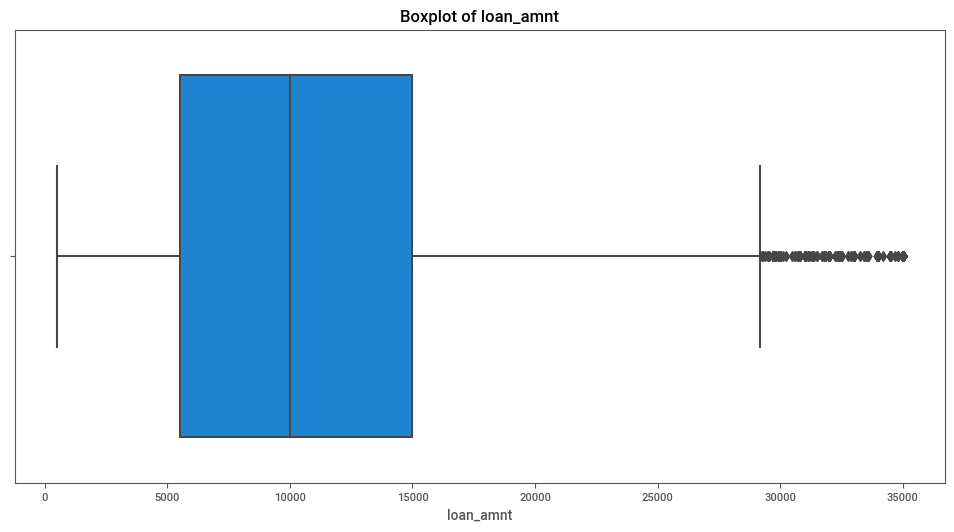

In [70]:
# making boxplot:
plt.figure(figsize=(12,6))
sns.boxplot(x="loan_amnt",data=df)
plt.title("Boxplot of loan_amnt")
plt.show()

In [71]:
# check with outlier range which is Q1(25%) nd Q3(75%):

Q1= df["loan_amnt"].quantile(0.25)
Q3= df["loan_amnt"].quantile(0.75)
IQR = Q3 - Q1

data = df[((df["loan_amnt"] < (Q1 - 1.5 * IQR)) | (df["loan_amnt"] > (Q3 + 1.5 * IQR)))]

In [72]:
data

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
31,31825.0,7.90,995.82,75000.0,Fully Paid,14.03,0.0,0.0,12.0,0.0,...,0,0,0,0,0,0,0,0,1,0
80,35000.0,17.27,551.84,150000.0,Fully Paid,7.51,0.0,1.0,11.0,0.0,...,0,0,0,0,0,0,0,0,0,1
128,35000.0,8.90,1111.37,125000.0,Fully Paid,22.71,0.0,0.0,8.0,0.0,...,0,0,0,0,0,0,0,0,1,0
185,35000.0,10.65,1140.07,168000.0,Fully Paid,3.17,1.0,1.0,16.0,0.0,...,0,0,0,0,0,0,0,0,1,0
209,29500.0,20.30,786.51,83000.0,Fully Paid,20.93,0.0,0.0,12.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19864,32000.0,20.85,863.01,62400.0,Fully Paid,13.04,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1
19875,32000.0,19.74,843.19,93500.0,Fully Paid,16.36,0.0,0.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,1
19889,30000.0,16.40,735.94,110000.0,Fully Paid,9.03,0.0,0.0,10.0,0.0,...,0,0,0,0,0,0,0,0,0,1
19902,30000.0,17.88,759.85,360000.0,Fully Paid,11.35,0.0,3.0,17.0,0.0,...,0,0,0,0,0,0,0,0,0,1


*HAMPEL FILLTER | 3 std dev. Away Method*

# Outlier values consider as outside the interval(|)
# formed by median, plus or minus 3 median absoulate deviations(M A D):

---
I = [ m e d i a n − 3 ⋅ M A D ; m e d i a n + 3 ⋅ M A D ]

---
M A D = m e d i a n ( | X i − ~ X | )



In [73]:
from scipy import stats

In [74]:
stats.zscore(df["loan_amnt"])

0       -0.844688
1       -1.179532
2       -1.192926
3       -0.174999
5       -0.844688
           ...   
39781   -1.179532
39782   -0.375906
39783   -0.844688
39784   -0.844688
39785   -0.509843
Name: loan_amnt, Length: 38612, dtype: float64

In [75]:
stats.zscore(df["loan_amnt"]).max()

3.1734462815401483

In [76]:
stats.zscore(df["loan_amnt"]).min()

-1.4474081084969297

In [77]:
# absulate value: "np.abs":
df[(np.abs(stats.zscore(df["loan_amnt"])) <3)]

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,24000.0,Fully Paid,27.65,0.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,59.83,30000.0,Charged Off,1.00,0.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,12252.0,Fully Paid,8.72,0.0,2.0,2.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,339.31,49200.0,Fully Paid,20.00,0.0,1.0,10.0,0.0,...,0,0,0,1,0,0,0,0,1,0
5,5000.0,7.90,156.46,36000.0,Fully Paid,11.20,0.0,3.0,9.0,0.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,8.07,78.42,110000.0,Fully Paid,11.33,0.0,0.0,13.0,0.0,...,0,0,0,0,0,0,0,0,1,0
39782,8500.0,10.28,275.38,18000.0,Fully Paid,6.40,1.0,1.0,6.0,0.0,...,0,0,0,0,0,0,0,0,1,0
39783,5000.0,8.07,156.84,100000.0,Fully Paid,2.30,0.0,0.0,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0
39784,5000.0,7.43,155.38,200000.0,Fully Paid,3.72,0.0,0.0,17.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [78]:
def cap_Zscore_outliers(series, zscore_threshold=3, verbose= False):
  ''' Caps ouliers to closets existing value within threshold(Modified Z-score).'''
  median_val = series.median()
  mad_val = series.mad() # Median absolute deviation

  z_score = (series - median_val) / mad_val
  outliers = abs(z_score) > zscore_threshold

  series = series.copy()
  series.loc[z_score > zscore_threshold] = series.loc[~outliers].max()
  series.loc[z_score < -zscore_threshold] = series.loc[~outliers].min()

  # for comparison purposes:
  if verbose:
    lbound = median_val - zscore_threshold * mad_val
    ubound = median_val + zscore_threshold * mad_val
    print('\n'.join(
        ["Capping outliers by the Modified Z-score method:",
         f' Z-score threshold: {zscore_threshold}',
         f' Lower bound: {lbound}',
         f' Upper bound: {ubound}\n']
    ))
    return series

cap_Zscore_outliers(df["loan_amnt"], verbose=True)


Capping outliers by the Modified Z-score method:
 Z-score threshold: 3
 Lower bound: -7762.4364865446805
 Upper bound: 27762.43648654468



0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39781     2500.0
39782     8500.0
39783     5000.0
39784     5000.0
39785     7500.0
Name: loan_amnt, Length: 38612, dtype: float64

Scaling Data

In [80]:
from sklearn import preprocessing

In [81]:
df[["loan_amnt","annual_inc"]].head(10)

,loan_amnt,annual_inc
0,5000.0,24000.0
1,2500.0,30000.0
2,2400.0,12252.0
3,10000.0,49200.0
5,5000.0,36000.0
6,7000.0,47004.0
7,3000.0,48000.0
8,5600.0,40000.0
9,5375.0,15000.0
10,6500.0,72000.0


Normalization:
---
min-max Normalization:


1. rescales values to be in the range between 0 and 1.
2. data ends with smaller standard dev. , which can suppr4esss the effect of outliers.




In [82]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[["loan_amnt","annual_inc"]])

In [83]:
X_scaled

array([[0.13043478, 0.00333556],
       [0.05797101, 0.00433622],
       [0.05507246, 0.00137625],
       ...,
       [0.13043478, 0.01601067],
       [0.13043478, 0.03268846],
       [0.20289855, 0.003002  ]])

In [84]:
pd.DataFrame(X_scaled, columns = (['loan_amnt','annual_inc']))

,loan_amnt,annual_inc
0,0.130435,0.003336
1,0.057971,0.004336
2,0.055072,0.001376
3,0.275362,0.007538
4,0.130435,0.005337
...,...,...
38607,0.057971,0.017678
38608,0.231884,0.002335
38609,0.130435,0.016011
38610,0.130435,0.032688


**Standardization:**

---


> all the features have a mean around zero and roughly **unit variance(mean = 0 and standard deviation = 1).**


> also make sure that outliers get weighted more than other values.






In [85]:
X_scaled = preprocessing.StandardScaler().fit_transform(df[["loan_amnt","annual_inc"]])

In [86]:
pd.DataFrame(X_scaled, columns = (["loan_amnt","annual_inc"]))

,loan_amnt,annual_inc
0,-0.844688,-0.710537
1,-1.179532,-0.617149
2,-1.192926,-0.893390
3,-0.174999,-0.318308
4,-0.844688,-0.523761
...,...,...
38607,-1.179532,0.628022
38608,-0.375906,-0.803925
38609,-0.844688,0.472375
38610,-0.844688,2.028839


**Feature Emgineering|Extraction**